In [ ]:
import pandas as pd
import sys
sys.path.insert(0, '/10 A KAI 2/week11/Time_Series_Forecasting_for_Portfolio_Management')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

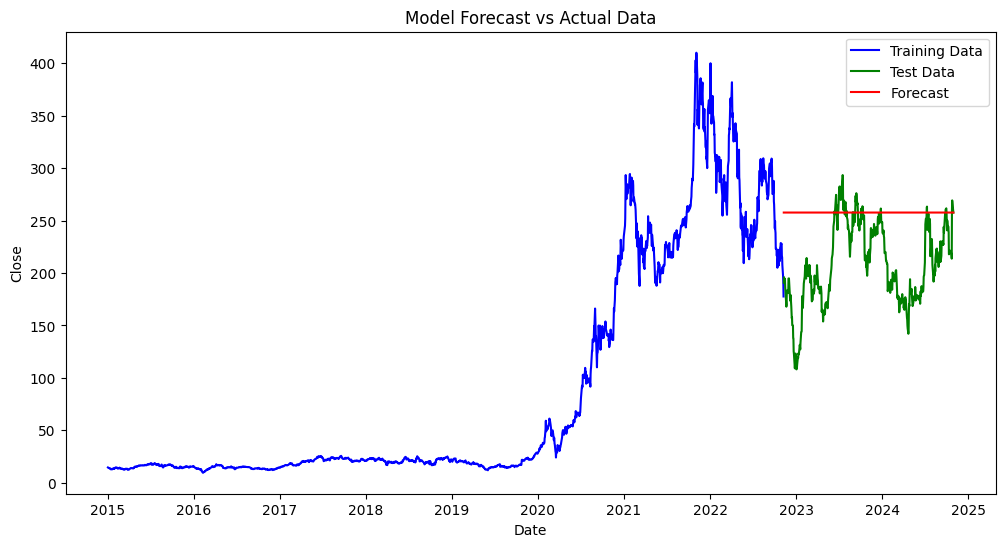

In [ ]:
# Evaluate and plot SARIMA model
processor.evaluate_model(test, 'SARIMA')
processor.plot_results(train, test, forecast_sarima, 'SARIMA')

In [ ]:
# Fit SARIMA model
processor.model_fit = processor.grid_search_sarima(
    p_values=[0, 1, 2],
    d_values=[0, 1],
    q_values=[0, 1, 2],
    seasonal_p=[0, 1],
    seasonal_d=[0, 1],
    seasonal_q=[0, 1],
    s=12
)

# Generate forecasts
forecast_sarima = processor.forecast(steps=len(test))

In [ ]:
# Prepare data for LSTM (normalizing)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(processor.time_series.values.reshape(-1, 1))

: 

In [ ]:
# Fit LSTM model
n_steps = 10  # Number of timesteps
processor.fit_lstm(data_scaled, n_steps=n_steps, epochs=200)

In [ ]:
# Predict with LSTM
lstm_predictions = processor.predict_lstm(data_scaled, n_steps=n_steps)

NameError: name 'test_data' is not defined

In [ ]:
# Rescale predictions to original scale
lstm_predictions_rescaled = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))

In [ ]:
# Prepare forecast series for LSTM
forecast_lstm = pd.Series(lstm_predictions_rescaled.flatten(), index=test.index)

d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Evaluate and plot LSTM model
processor.evaluate_model(test, 'LSTM')
processor.plot_results(train, test, forecast_lstm, 'LSTM')